In [1]:
import json
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
with open('/kaggle/input/vqaver2/VQAv2/Questions/v2_Questions_Train_mscoco/v2_OpenEnded_mscoco_train2014_questions.json', 'r') as f:
    questions_data = json.load(f)

with open('/kaggle/input/vqaver2/VQAv2/Annotations/v2_Annotations_Train_mscoco/v2_mscoco_train2014_annotations.json', 'r') as f:
    annotations_data = json.load(f)

In [5]:
print(f"Questions file có {len(questions_data['questions'])} câu hỏi")
print(f"Annotations file có {len(annotations_data['annotations'])} annotations")

Questions file có 443757 câu hỏi
Annotations file có 443757 annotations


In [6]:
print("Questions keys:", list(questions_data.keys()))
print("Annotations keys:", list(annotations_data.keys()))

Questions keys: ['info', 'task_type', 'data_type', 'license', 'data_subtype', 'questions']
Annotations keys: ['info', 'license', 'data_subtype', 'annotations', 'data_type']


In [7]:
questions_df = pd.DataFrame(questions_data['questions'])
annotations_df = pd.DataFrame(annotations_data['annotations'])

In [13]:
questions_df.shape

(443757, 3)

In [14]:
annotations_df.shape

(443757, 6)

In [10]:
questions_df.head()

,image_id,question,question_id
0,458752,What is this photo taken looking through?,458752000
1,458752,What position is this man playing?,458752001
2,458752,What color is the players shirt?,458752002
3,458752,Is this man a professional baseball player?,458752003
4,262146,What color is the snow?,262146000


In [15]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443757 entries, 0 to 443756
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   image_id     443757 non-null  int64 
 1   question     443757 non-null  object
 2   question_id  443757 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 10.2+ MB


In [17]:
annotations_df.head(10)

,question_type,multiple_choice_answer,answers,image_id,answer_type,question_id
0,what is this,net,"[{'answer': 'net', 'answer_confidence': 'maybe...",458752,other,458752000
1,what,pitcher,"[{'answer': 'pitcher', 'answer_confidence': 'y...",458752,other,458752001
2,what color is the,orange,"[{'answer': 'orange', 'answer_confidence': 'ye...",458752,other,458752002
3,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",458752,yes/no,458752003
4,what color is the,white,"[{'answer': 'white', 'answer_confidence': 'yes...",262146,other,262146000
5,what is the person,skiing,"[{'answer': 'skiing', 'answer_confidence': 'ye...",262146,other,262146001
6,what color is the,red,"[{'answer': 'red', 'answer_confidence': 'yes',...",262146,other,262146002
7,what is in the,frisbee,"[{'answer': 'frisbee', 'answer_confidence': 'y...",524291,other,524291000
8,is the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",524291,yes/no,524291001
9,is the,frisbee,"[{'answer': 'frisbee', 'answer_confidence': 'y...",524291,other,524291002


In [18]:
annotations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443757 entries, 0 to 443756
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   question_type           443757 non-null  object
 1   multiple_choice_answer  443757 non-null  object
 2   answers                 443757 non-null  object
 3   image_id                443757 non-null  int64 
 4   answer_type             443757 non-null  object
 5   question_id             443757 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 20.3+ MB


In [20]:
sample_idx = 1
print(f"Question sample {sample_idx}:")
print(questions_df.iloc[sample_idx])

Question sample 1:
image_id                                   458752
question       What position is this man playing?
question_id                             458752001
Name: 1, dtype: object


In [21]:
print(f"\nAnnotation sample {sample_idx}:")
annotations_df.iloc[sample_idx]


Annotation sample 1:


question_type                                                          what
multiple_choice_answer                                              pitcher
answers                   [{'answer': 'pitcher', 'answer_confidence': 'y...
image_id                                                             458752
answer_type                                                           other
question_id                                                       458752001
Name: 1, dtype: object

In [22]:
print(f"\nAnswers chi tiết của sample {sample_idx}:")
sample_answers = annotations_df.iloc[sample_idx]['answers']
for i, answer in enumerate(sample_answers):
    print(f"  Answer {i+1}: {answer}")


Answers chi tiết của sample 1:
  Answer 1: {'answer': 'pitcher', 'answer_confidence': 'yes', 'answer_id': 1}
  Answer 2: {'answer': 'catcher', 'answer_confidence': 'no', 'answer_id': 2}
  Answer 3: {'answer': 'pitcher', 'answer_confidence': 'yes', 'answer_id': 3}
  Answer 4: {'answer': 'pitcher', 'answer_confidence': 'yes', 'answer_id': 4}
  Answer 5: {'answer': 'pitcher', 'answer_confidence': 'yes', 'answer_id': 5}
  Answer 6: {'answer': 'pitcher', 'answer_confidence': 'yes', 'answer_id': 6}
  Answer 7: {'answer': 'pitcher', 'answer_confidence': 'yes', 'answer_id': 7}
  Answer 8: {'answer': 'pitcher', 'answer_confidence': 'yes', 'answer_id': 8}
  Answer 9: {'answer': 'pitcher', 'answer_confidence': 'yes', 'answer_id': 9}
  Answer 10: {'answer': 'pitcher', 'answer_confidence': 'yes', 'answer_id': 10}


In [25]:
annotations_df['question_type'].value_counts().head(10)

question_type
how many             42339
is the               34927
what                 34608
what color is the    27962
what is the          24502
none of the above    16973
is this              16444
is this a            16024
what is              13561
what kind of         11192
Name: count, dtype: int64

In [26]:
annotations_df['answer_type'].value_counts()

answer_type
other     219269
yes/no    166882
number     57606
Name: count, dtype: int64

In [29]:
merged_df = pd.merge(questions_df, annotations_df, on='question_id')
print(f"Merged DataFrame shape: {merged_df.shape}")
print("\nMerged DataFrame head(10):")
print(merged_df[['question', 'question_type', 'answer_type', 'multiple_choice_answer']].head(10))

Merged DataFrame shape: (443757, 8)

Merged DataFrame head(10):
                                          question       question_type  \
0        What is this photo taken looking through?        what is this   
1               What position is this man playing?                what   
2                 What color is the players shirt?   what color is the   
3      Is this man a professional baseball player?             is this   
4                          What color is the snow?   what color is the   
5                        What is the person doing?  what is the person   
6              What color is the persons headwear?   what color is the   
7                    What is in the person's hand?      what is in the   
8                              Is the dog waiting?              is the   
9  Is the dog looking at a tennis ball or frisbee?              is the   

  answer_type multiple_choice_answer  
0       other                    net  
1       other                pitcher  
2   

In [46]:
def show_sample_with_image(idx):
    row = merged_df.iloc[idx]
    
    print(f"\nSample {idx}:")
    print(f"Question: {row['question']}")
    print(f"Question Type: {row['question_type']}")
    print(f"Answer: {row['multiple_choice_answer']}")
    print(f"Answer Type: {row['answer_type']}")

    question_id = row['question_id']
    image_id = questions_df[questions_df['question_id'] == question_id]['image_id'].iloc[0]
    
    image_path = f"/kaggle/input/vqaver2/VQAv2/Images/train2014/train2014/COCO_train2014_{image_id:012d}.jpg"
    img = Image.open(image_path)

    
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.title(f"Q: {row['question']}\nA: {row['multiple_choice_answer']}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()



Sample 0:
Question: What is this photo taken looking through?
Question Type: what is this
Answer: net
Answer Type: other


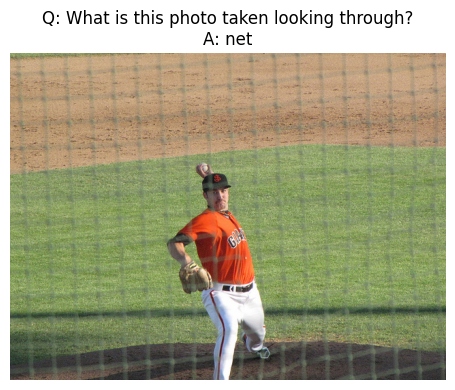


Sample 1:
Question: What position is this man playing?
Question Type: what
Answer: pitcher
Answer Type: other


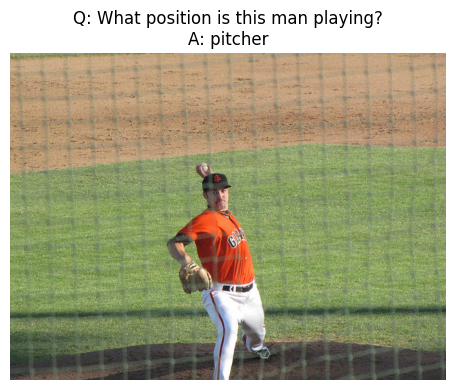


Sample 2:
Question: What color is the players shirt?
Question Type: what color is the
Answer: orange
Answer Type: other


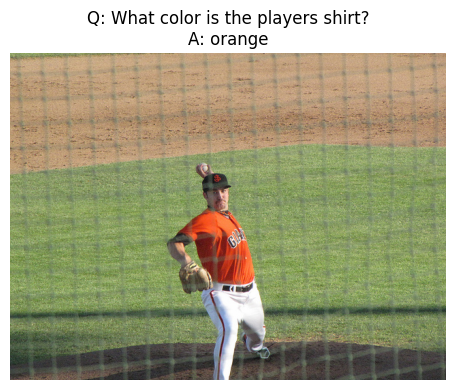


Sample 3:
Question: Is this man a professional baseball player?
Question Type: is this
Answer: yes
Answer Type: yes/no


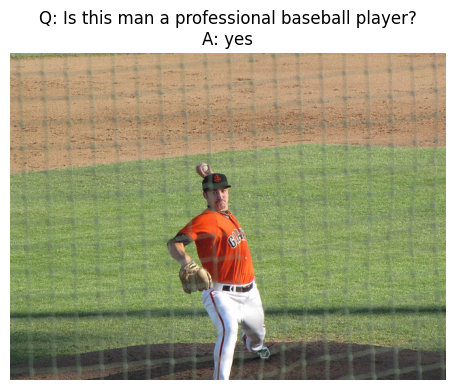

In [49]:
for i in range(4):
    show_sample_with_image(i)

In [53]:
merged_df['multiple_choice_answer'].value_counts().head(10)

multiple_choice_answer
yes      84978
no       82516
1        12540
2        12215
white     8916
3         6536
blue      5455
red       5201
black     5066
0         4977
Name: count, dtype: int64

In [ ]:
import pandas as pd
import json

annotations_path = '/kaggle/input/vqaver2/VQAv2/Annotations/v2_Annotations_Train_mscoco/v2_mscoco_train2014_annotations.json'

# Đọc dữ liệu và tạo DataFrame
with open(annotations_path, 'r') as f:
    df_full = pd.DataFrame(json.load(f)['annotations'])

# Tính toán và kết hợp kết quả phân bổ
comparison = pd.DataFrame({
    'Toàn bộ Dataset (%)': df_full['answer_type'].value_counts(normalize=True) * 100,
    'Tập con 10% (%)': df_full.iloc[:int(len(df_full) * 0.1)]['answer_type'].value_counts(normalize=True) * 100
})

print(comparison.round(2))